# Principal Component Analysis

## Import Libraries and data

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('churn_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [2]:
numeric_list = list(df.select_dtypes(include = {'int64','float64'}))
del numeric_list[:2]
del numeric_list[13:]

## Perform PCA

In [3]:
pca_df = df[numeric_list]

In [4]:
scaler = StandardScaler()

pca_norm = scaler.fit_transform(pca_df)
pca_norm

pd.DataFrame(pca_norm).to_csv('standarized_churn.csv', index=False)


In [5]:
pca = PCA(n_components = pca_norm.shape[1])
pc = pca.fit_transform(pca_norm)

In [6]:
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4','PC 5','PC 6','PC 7',
                                  'PC 8','PC 9','PC 10','PC 11','PC 12','PC 13'])
pc_df

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13
0,-1.632635,-3.296354,0.578184,2.947064,0.049200,0.236283,-1.239584,0.694516,0.630699,0.126840,0.014701,0.703792,-0.025562
1,-1.678890,-0.663793,-0.165263,-0.587533,-0.864341,1.227328,-1.145874,1.079940,-0.122828,0.062935,-1.462859,0.927392,-0.036908
2,-0.947985,-1.662107,1.500542,1.260078,-0.604303,1.120935,-1.470020,-0.081259,0.009108,0.484669,0.729901,-0.259270,0.060309
3,-0.928918,0.883883,-0.255494,1.343020,-1.897874,0.114564,0.424392,-1.721621,0.296289,-0.700928,0.262978,-1.253845,0.127564
4,-1.889784,1.581549,-0.992000,0.972279,1.138263,-0.503190,-0.011660,-0.813185,1.456770,0.191183,-0.479151,-1.201817,-0.058608
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.883026,-0.917225,0.119696,-1.368667,-0.215508,-0.483779,1.335592,-0.760748,-0.713339,0.309577,-0.617506,0.678582,0.082947
9996,1.468912,3.517718,0.444508,0.815071,-1.000443,-0.606728,0.790954,0.434722,0.276539,1.907382,0.383783,2.803534,-0.025294
9997,0.583453,-0.277782,0.760598,0.478853,0.423992,-0.918188,-0.197058,0.968909,-0.822408,-0.215000,-0.287687,-1.015938,-0.088263
9998,2.036320,2.007936,-0.955911,-0.130067,-1.730513,0.281978,-0.288711,1.012659,-0.320503,0.318211,-0.631463,0.640230,-0.069620


In [7]:
load = pd.DataFrame(pca.components_, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4','PC 5','PC 6','PC 7',
                                  'PC 8','PC 9','PC 10','PC 11','PC 12','PC 13'],index = pca_df.columns)
load

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13
Lat,-0.023161,0.007911,-0.001230,0.014244,0.001860,0.004185,0.005811,-0.020020,0.004283,0.017665,0.705211,0.040456,0.706719
Lng,-0.714010,0.180879,0.653439,-0.014267,0.052795,-0.054602,0.009174,0.152355,0.031043,-0.007070,-0.008913,-0.004500,-0.010435
Population,-0.031715,-0.285753,0.151916,0.447882,-0.443537,0.195742,-0.249550,-0.092711,-0.447906,0.153686,0.006569,-0.404228,0.008289
Children,0.109414,-0.736871,0.322012,-0.464670,0.227235,-0.041772,-0.126214,-0.144998,0.108875,0.063449,0.026652,-0.136041,-0.002713
Age,-0.094872,0.344620,-0.119517,-0.107498,0.436759,0.312779,-0.455981,-0.353186,0.011245,0.420468,0.009197,-0.218356,-0.021522
Income,-0.030887,-0.087695,0.098791,0.130597,-0.096321,0.100371,0.597523,-0.403463,0.082442,0.592380,-0.036725,0.257205,-0.012558
Outage_sec_perweek,-0.010719,-0.052349,0.053682,0.034812,-0.188399,0.773549,0.051915,0.003835,0.519791,-0.290766,-0.002190,-0.041495,0.003902
Email,-0.020375,-0.086499,0.079161,-0.065531,0.093484,0.335467,-0.184658,-0.125375,-0.510974,-0.194665,-0.038433,0.714123,0.002926
Contacts,0.090273,-0.172285,-0.027392,0.192459,0.342892,0.246663,0.057056,0.760622,-0.052695,0.397088,0.003806,0.060669,0.002798
Yearly_equip_failure,0.018619,-0.151301,0.055304,0.437471,-0.083596,-0.275852,-0.515406,-0.052146,0.494601,0.143419,-0.037339,0.405280,0.005673


In [8]:
variance = pca.explained_variance_ratio_ *100
var_df = pd.DataFrame(variance.round(2),columns =['Variance'],index=['PC 1', 'PC 2', 'PC 3', 'PC 4','PC 5','PC 6','PC 7',
                                  'PC 8','PC 9','PC 10','PC 11','PC 12','PC 13'])
var_df

,Variance
PC 1,15.34
PC 2,9.49
PC 3,8.11
PC 4,8.04
PC 5,7.87
PC 6,7.77
PC 7,7.69
PC 8,7.64
PC 9,7.57
PC 10,7.40


In [9]:
eigenvalues = pca.explained_variance_
eigen_df = pd.DataFrame(eigenvalues.round(2),columns =['Eigenvalues'],index=['PC 1', 'PC 2', 'PC 3', 'PC 4','PC 5','PC 6','PC 7',
                                  'PC 8','PC 9','PC 10','PC 11','PC 12','PC 13'])
eigen_df

,Eigenvalues
PC 1,1.99
PC 2,1.23
PC 3,1.05
PC 4,1.04
PC 5,1.02
PC 6,1.01
PC 7,1.00
PC 8,0.99
PC 9,0.98
PC 10,0.96


In [10]:
pca_7 = PCA(n_components=7,random_state=2020)

var_7 = pca_7.fit_transform(pca_norm)
variance7 = pca_7.explained_variance_ratio_ *100
var7_df = pd.DataFrame(variance7.round(2),columns =['Variance'],index=['PC 1', 'PC 2', 'PC 3',
                                                                       'PC 4','PC 5','PC 6','PC 7'])
var7_df

,Variance
PC 1,15.34
PC 2,9.49
PC 3,8.11
PC 4,8.04
PC 5,7.87
PC 6,7.77
PC 7,7.69


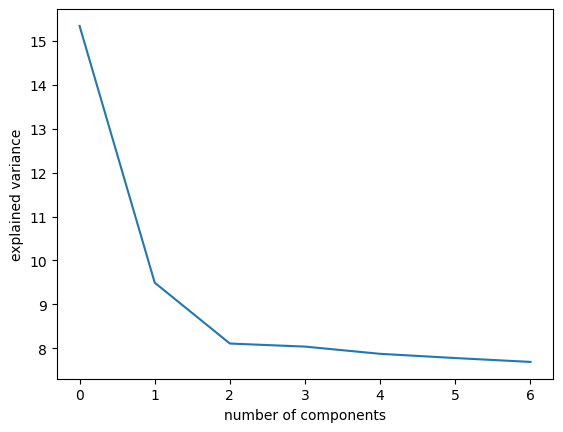

In [11]:
plt.plot(pca_7.explained_variance_ratio_*100)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [12]:
var7_df.sum()

Variance    64.31
dtype: float64